#  District level Covid-19 Analysis of INDIAN STATES 

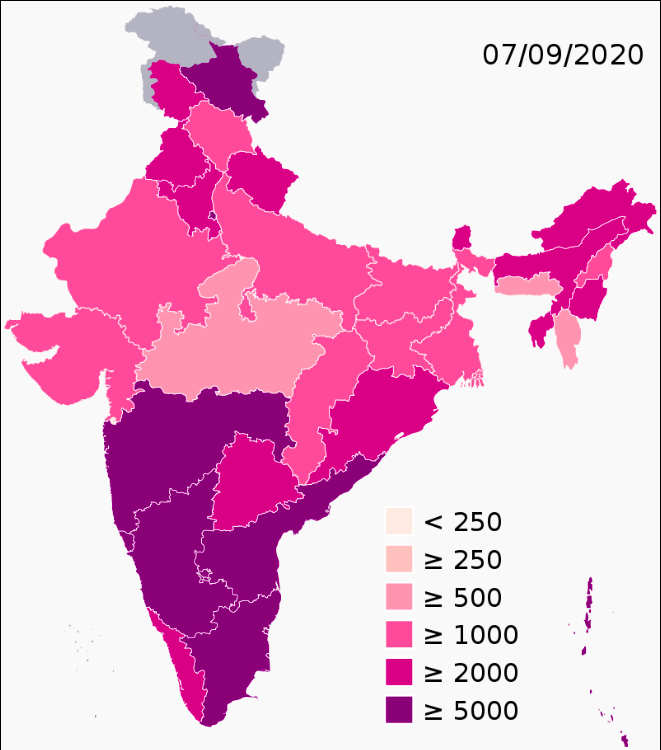

####  ** Credit - Wikipedia Confirmed Cases per Million residents

### Please do upvote if you find this notebook useful:) Stay Safe.

In [ ]:
## Loading the libraries 
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import json
import folium
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Loading the Dataset
district_data = pd.read_csv("/kaggle/input/covid-india-daily-district-level-data/district_level_data.csv")
district_data['Tested'] = district_data['Tested'].fillna(0)
## Checking the Data type of the dataframe
district_data.dtypes
## Change the Date from on=bject to Date datatype
district_data['Date'] = pd.to_datetime(district_data['Date'],format = "%d/%m/%y")

## --- Top 5 Most Affected States of INDIA from Covid-19 ---

## 1.  MAHARASHTRA COVID-19 ANALYSIS AT DISTRICT LEVEL

In [ ]:
maharashtra_covid_status = district_data[district_data['State']== 'Maharashtra']
maharashtra_covid_status = maharashtra_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
maharashtra_covid_status['Active_Cases'] = maharashtra_covid_status['Confirmed'] - (maharashtra_covid_status['Recovered'] + maharashtra_covid_status['Deceased'])

In [ ]:
## Loading the Json data for Tamil Nadu
maharashtra_data = open('/kaggle/input/indian-states-geojson-data/maharashtra.geojson',) 
maharashtra_geo_data = json.load(maharashtra_data) 
fig = px.choropleth(maharashtra_covid_status,geojson = maharashtra_geo_data, color = "Active_Cases",
                    locations = "District", featureidkey = "properties.district",
                    color_continuous_scale="magenta",
                    title = "Maharashtra  District level Covid-19 Active Cases"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text = 'Active Covid-19 cases in Maharashtra')
fig.show()

In [ ]:
maharashtra_covid_status = district_data[district_data['State']== 'Maharashtra']
maharashtra_covid_status['Date'] = pd.to_datetime(maharashtra_covid_status['Date'],format = "%d/%m/%y")
maharashtra_covid_summarised = maharashtra_covid_status.groupby(['Date']).sum().reset_index()
maharashtra_covid_summarised['Active_Cases'] = maharashtra_covid_summarised['Confirmed'] - (maharashtra_covid_summarised['Recovered'] + maharashtra_covid_summarised['Deceased'])

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Confirmed","Active_Cases", "Recovered","Death"))

fig.add_trace(go.Scatter(x=maharashtra_covid_summarised['Date'], y=maharashtra_covid_summarised['Confirmed'],
                    marker=dict(color=maharashtra_covid_summarised['Confirmed'], coloraxis="coloraxis")),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x=maharashtra_covid_summarised['Date'], y=maharashtra_covid_summarised['Active_Cases'],
                    marker=dict(color=maharashtra_covid_summarised['Active_Cases'], coloraxis="coloraxis")),
              row = 1, col = 2)

fig.add_trace(go.Scatter(x=maharashtra_covid_summarised['Date'], y=maharashtra_covid_summarised['Recovered'],
                    marker=dict(color=maharashtra_covid_summarised['Recovered'], coloraxis="coloraxis")),
              row = 2, col = 1)

fig.add_trace(go.Scatter(x=maharashtra_covid_summarised['Date'], y=maharashtra_covid_summarised['Deceased'],
                    marker=dict(color=maharashtra_covid_summarised['Deceased'], coloraxis="coloraxis")),
              row = 2, col = 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases in Maharashtra")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [ ]:
maharashtra_covid_status = maharashtra_covid_status[~maharashtra_covid_status['District'].isin(['Unknown'])]
maharashtra_covid_trends = maharashtra_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
maharashtra_covid_trends = maharashtra_covid_trends[["District","Confirmed","Recovered","Deceased"]]
maharashtra_covid_trends['Active_Cases'] = maharashtra_covid_trends['Confirmed'] - (maharashtra_covid_trends['Recovered'] + maharashtra_covid_trends['Deceased'])
maharashtra_covid_trends['Mortality Rate Per 100'] = np.round((maharashtra_covid_trends['Deceased']/maharashtra_covid_trends['Confirmed'])*100,2)
maharashtra_covid_trends = maharashtra_covid_trends.replace(np.nan,0)
maharashtra_covid_trends = maharashtra_covid_trends.set_index('District')
maharashtra_covid_trends.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Oranges',subset=["Active_Cases"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='YlOrBr',subset=['Mortality Rate Per 100'])

In [ ]:
most_effected_maharashtra_districts = maharashtra_covid_status
most_effected_maharashtra_districts['Active_Cases'] = most_effected_maharashtra_districts['Confirmed'] - (most_effected_maharashtra_districts['Recovered'] + most_effected_maharashtra_districts['Deceased'])
most_effected_maharashtra_districts = most_effected_maharashtra_districts.groupby('District').sum().sort_values('Confirmed',ascending = False)
top5_most_effected_maharashtra_districts = most_effected_maharashtra_districts.head(5)
top5_most_effected_maharashtra_districts['District'] = top5_most_effected_maharashtra_districts.index
top_districts = top5_most_effected_maharashtra_districts['District'].tolist()
## Check if the states name is present in "top 10 effected states" then include in the dataset
top5_most_effected_maharashtra_districts_filtered = maharashtra_covid_status[maharashtra_covid_status['District'].isin(top_districts)]
top5_most_effected_maharashtra_districts_filtered = top5_most_effected_maharashtra_districts_filtered.drop_duplicates(["District"], keep = 'last', inplace = False)

In [ ]:
confirmed_case_data = top5_most_effected_maharashtra_districts_filtered.sort_values('Confirmed', ascending=True)
active_case_data = top5_most_effected_maharashtra_districts_filtered.sort_values('Active_Cases', ascending=True)
recovered_case_data = top5_most_effected_maharashtra_districts_filtered.sort_values('Recovered', ascending=True)
death_case_data = top5_most_effected_maharashtra_districts_filtered.sort_values('Deceased', ascending=True)

fig = make_subplots(rows=4, cols=1, shared_yaxes=True, 
                    subplot_titles=("Top 5 District Confirmed Cases of Covid-19 in Maharashtra",
                                    "Top 5 District Active Cases of Covid-19 in Maharashtra",
                                    "Top 5 District Recovered Cases of Covid-19 in Maharashtra", 
                                    "Top 5 District Death Cases of Covid-19 in Maharashtra"))

fig.add_trace(go.Bar(x=confirmed_case_data['Confirmed'],
                        y=confirmed_case_data['District'],
                        name='Confirmed cases',
                        orientation = 'h',
                    ),
              1, 1)

fig.add_trace(go.Bar(x=active_case_data['Active_Cases'],
                        y=active_case_data['District'],
                        name='Active cases',
                        orientation = 'h',
                    ),
              2, 1)

fig.add_trace(go.Bar(x=recovered_case_data['Recovered'],
                     y=recovered_case_data['District'],
                    name='Recovered cases',
                    orientation = 'h'),
              3, 1)
fig.add_trace(go.Bar(x=death_case_data['Deceased'],
                     y=death_case_data['District'],
                    name='Deceased cases',
                    orientation = 'h'),
              4, 1)

fig.update_layout(height=800, width=600,coloraxis=dict(colorscale='viridis'))
fig.show()

## 2. TAMIL NADU COVID-19 ANALYSIS AT DISTRICT LEVEL  

In [ ]:
tamil_nadu_covid_status = district_data[district_data['State']== 'Tamil Nadu']
tamil_nadu_covid_status = tamil_nadu_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
tamil_nadu_covid_status['Active_Cases'] = tamil_nadu_covid_status['Confirmed'] - (tamil_nadu_covid_status['Recovered'] + tamil_nadu_covid_status['Deceased'])

In [ ]:
## Loading the Json data for Tamil Nadu
tamil_nadu_data = open('/kaggle/input/indian-states-geojson-data/tamilnadu.geojson',) 
gujarat_geo_data = json.load(tamil_nadu_data) 
fig = px.choropleth(tamil_nadu_covid_status,geojson = gujarat_geo_data, color = "Active_Cases",
                    locations = "District", featureidkey = "properties.district",
                    color_continuous_scale="magenta"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text = 'Active Covid-19 cases in Tamil Nadu')
fig.show()

In [ ]:
tamil_nadu_covid_status = district_data[district_data['State']== 'Tamil Nadu']
tamil_nadu_covid_status['Date'] = pd.to_datetime(tamil_nadu_covid_status['Date'],format = "%d/%m/%y")
tamil_nadu_covid_summarised = tamil_nadu_covid_status.groupby(['Date']).sum().reset_index()
tamil_nadu_covid_summarised['Active_Cases'] = tamil_nadu_covid_summarised['Confirmed'] - (tamil_nadu_covid_summarised['Recovered'] + tamil_nadu_covid_summarised['Deceased'])

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Confirmed","Active_Cases", "Recovered","Death"))

fig.add_trace(go.Scatter(x=tamil_nadu_covid_summarised['Date'], y=tamil_nadu_covid_summarised['Confirmed'],
                    marker=dict(color=tamil_nadu_covid_summarised['Confirmed'], coloraxis="coloraxis")),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x=tamil_nadu_covid_summarised['Date'], y=tamil_nadu_covid_summarised['Active_Cases'],
                    marker=dict(color=tamil_nadu_covid_summarised['Active_Cases'], coloraxis="coloraxis")),
              row = 1, col = 2)

fig.add_trace(go.Scatter(x=tamil_nadu_covid_summarised['Date'], y=tamil_nadu_covid_summarised['Recovered'],
                    marker=dict(color=tamil_nadu_covid_summarised['Recovered'], coloraxis="coloraxis")),
              row = 2, col = 1)

fig.add_trace(go.Scatter(x=tamil_nadu_covid_summarised['Date'], y=tamil_nadu_covid_summarised['Deceased'],
                    marker=dict(color=tamil_nadu_covid_summarised['Deceased'], coloraxis="coloraxis")),
              row = 2, col = 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases in Tamil Nadu")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [ ]:
tamil_nadu_covid_status = tamil_nadu_covid_status[~tamil_nadu_covid_status['District'].isin(['Other State', 'Airport Quarantine', 'Railway Quarantine','Unknown'])]
tamil_nadu_covid_trends = tamil_nadu_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
tamil_nadu_covid_trends = tamil_nadu_covid_trends[["District","Confirmed","Recovered","Deceased"]]
tamil_nadu_covid_trends['Active_Cases'] = tamil_nadu_covid_trends['Confirmed'] - (tamil_nadu_covid_trends['Recovered'] + tamil_nadu_covid_trends['Deceased'])
tamil_nadu_covid_trends['Mortality Rate Per 100'] = np.round((tamil_nadu_covid_trends['Deceased']/tamil_nadu_covid_trends['Confirmed'])*100,2)
tamil_nadu_covid_trends = tamil_nadu_covid_trends.replace(np.nan,0)
tamil_nadu_covid_trends = tamil_nadu_covid_trends.set_index('District')
tamil_nadu_covid_trends.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Oranges',subset=["Active_Cases"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='YlOrBr',subset=['Mortality Rate Per 100'])

In [ ]:
most_effected_tamil_nadu_districts = tamil_nadu_covid_status
most_effected_tamil_nadu_districts['Active_Cases'] = most_effected_tamil_nadu_districts['Confirmed'] - (most_effected_tamil_nadu_districts['Recovered'] + most_effected_tamil_nadu_districts['Deceased'])
most_effected_tamil_nadu_districts = most_effected_tamil_nadu_districts.groupby('District').sum().sort_values('Confirmed',ascending = False)
top5_most_effected_tamil_nadu_districts = most_effected_tamil_nadu_districts.head(5)
top5_most_effected_tamil_nadu_districts['District'] = top5_most_effected_tamil_nadu_districts.index
top_districts = top5_most_effected_tamil_nadu_districts['District'].tolist()
## Check if the states name is present in "top 10 effected states" then include in the dataset
top5_most_effected_tamil_nadu_districts_filtered = tamil_nadu_covid_status[tamil_nadu_covid_status['District'].isin(top_districts)]

In [ ]:
top5_most_effected_tamil_nadu_districts_filtered = top5_most_effected_tamil_nadu_districts_filtered.drop_duplicates(["District"], keep = 'last', inplace = False)
confirmed_case_data = top5_most_effected_tamil_nadu_districts_filtered.sort_values('Confirmed', ascending=True)
active_case_data = top5_most_effected_tamil_nadu_districts_filtered.sort_values('Active_Cases', ascending=True)
recovered_case_data = top5_most_effected_tamil_nadu_districts_filtered.sort_values('Recovered', ascending=True)
death_case_data = top5_most_effected_tamil_nadu_districts_filtered.sort_values('Deceased', ascending=True)

fig = make_subplots(rows=4, cols=1, shared_yaxes=True, 
                    subplot_titles=("Top 5 District Confirmed Cases of Covid-19 in Tamil Nadu",
                                    "Top 5 District Active Cases of Covid-19 in Tamil Nadu",
                                    "Top 5 District Recovered Cases of Covid-19 in Tamil Nadu", 
                                    "Top 5 District Death Cases of Covid-19 in Tamil Nadu"))

fig.add_trace(go.Bar(x=confirmed_case_data['Confirmed'],
                        y=confirmed_case_data['District'],
                        name='Confirmed cases',
                        orientation = 'h',
                    ),
              1, 1)

fig.add_trace(go.Bar(x=active_case_data['Active_Cases'],
                        y=active_case_data['District'],
                        name='Active cases',
                        orientation = 'h',
                    ),
              2, 1)

fig.add_trace(go.Bar(x=recovered_case_data['Recovered'],
                     y=recovered_case_data['District'],
                    name='Recovered cases',
                    orientation = 'h'),
              3, 1)
fig.add_trace(go.Bar(x=death_case_data['Deceased'],
                     y=death_case_data['District'],
                    name='Deceased cases',
                    orientation = 'h'),
              4, 1)

fig.update_layout(height=800, width=600,coloraxis=dict(colorscale='Bluered_r'))
fig.show()

# 3. DELHI COVID-19 ANALYSIS 

In [ ]:
## District wise Analysis
delhi_covid_status = district_data[district_data['State']== 'Delhi']
delhi_covid_status = delhi_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
delhi_covid_status['Active_Cases'] = delhi_covid_status['Confirmed'] - (delhi_covid_status['Recovered'] + delhi_covid_status['Deceased'])


In [ ]:
## Loading the Json data for Delhi
delhi_data = open('/kaggle/input/indian-states-geojson-data/delhi.geojson',) 
delhi_geo_data = json.load(delhi_data) 
fig = px.choropleth(delhi_covid_status,geojson = delhi_geo_data, color = "Active_Cases",
                    locations = "District", featureidkey = "properties.district",
                    color_continuous_scale="magenta"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text = 'Active Covid-19 cases in Delhi')
fig.show()

In [ ]:
delhi_covid_status = district_data[district_data['State']== 'Delhi']
delhi_covid_status['Date'] = pd.to_datetime(delhi_covid_status['Date'],format = "%d/%m/%y")
delhi_covid_summarised = delhi_covid_status.groupby(['Date']).sum().reset_index()
delhi_covid_summarised['Active_Cases'] = delhi_covid_summarised['Confirmed'] - (delhi_covid_summarised['Recovered'] + delhi_covid_summarised['Deceased'])

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Confirmed","Active_Cases", "Recovered","Death"))

fig.add_trace(go.Scatter(x=delhi_covid_summarised['Date'], y=delhi_covid_summarised['Confirmed'],
                    marker=dict(color=delhi_covid_summarised['Confirmed'], coloraxis="coloraxis")),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x=delhi_covid_summarised['Date'], y=delhi_covid_summarised['Active_Cases'],
                    marker=dict(color=delhi_covid_summarised['Active_Cases'], coloraxis="coloraxis")),
              row = 1, col = 2)

fig.add_trace(go.Scatter(x=delhi_covid_summarised['Date'], y=delhi_covid_summarised['Recovered'],
                    marker=dict(color=delhi_covid_summarised['Recovered'], coloraxis="coloraxis")),
              row = 2, col = 1)

fig.add_trace(go.Scatter(x=delhi_covid_summarised['Date'], y=delhi_covid_summarised['Deceased'],
                    marker=dict(color=delhi_covid_summarised['Deceased'], coloraxis="coloraxis")),
              row = 2, col = 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases in Delhi")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

## 4. KARNATAKA COVID-19 ANALYSIS DISTRICT LEVEL

In [ ]:
## District wise Analysis
karnataka_covid_status = district_data[district_data['State']== 'Karnataka']
karnataka_covid_status = karnataka_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
karnataka_covid_status['Active_Cases'] = karnataka_covid_status['Confirmed'] - (karnataka_covid_status['Recovered'] + karnataka_covid_status['Deceased'])

In [ ]:
## Loading the Json data for Karnataka
karnataka_data = open('/kaggle/input/indian-states-geojson-data/karnataka.geojson',) 
karnataka_geo_data = json.load(karnataka_data) 
fig = px.choropleth(karnataka_covid_status,geojson = karnataka_geo_data, color = "Active_Cases",
                    locations = "District", featureidkey = "properties.district",
                    color_continuous_scale="magenta"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text = "Active Cases of Covid-19 in Karnataka")
fig.show()

In [ ]:
karnataka_covid_status = district_data[district_data['State']== 'Karnataka']
karnataka_covid_status['Date'] = pd.to_datetime(karnataka_covid_status['Date'],format = "%d/%m/%y")
karnataka_covid_summarised = karnataka_covid_status.groupby(['Date']).sum().reset_index()
karnataka_covid_summarised['Active_Cases'] = karnataka_covid_summarised['Confirmed'] - (karnataka_covid_summarised['Recovered'] + karnataka_covid_summarised['Deceased'])

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Confirmed","Active_Cases", "Recovered","Death"))

fig.add_trace(go.Scatter(x=karnataka_covid_summarised['Date'], y=karnataka_covid_summarised['Confirmed'],
                    marker=dict(color=karnataka_covid_summarised['Confirmed'], coloraxis="coloraxis")),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x=karnataka_covid_summarised['Date'], y=karnataka_covid_summarised['Active_Cases'],
                    marker=dict(color=karnataka_covid_summarised['Active_Cases'], coloraxis="coloraxis")),
              row = 1, col = 2)

fig.add_trace(go.Scatter(x=karnataka_covid_summarised['Date'], y=karnataka_covid_summarised['Recovered'],
                    marker=dict(color=karnataka_covid_summarised['Recovered'], coloraxis="coloraxis")),
              row = 2, col = 1)

fig.add_trace(go.Scatter(x=karnataka_covid_summarised['Date'], y=karnataka_covid_summarised['Deceased'],
                    marker=dict(color=karnataka_covid_summarised['Deceased'], coloraxis="coloraxis")),
              row = 2, col = 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases in Karnataka")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [ ]:
karnataka_covid_trends = karnataka_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
karnataka_covid_trends = karnataka_covid_trends[["District","Confirmed","Recovered","Deceased"]]
karnataka_covid_trends['Active_Cases'] = karnataka_covid_trends['Confirmed'] - (karnataka_covid_trends['Recovered'] + karnataka_covid_trends['Deceased'])
karnataka_covid_trends['Mortality Rate Per 100'] = np.round((karnataka_covid_trends['Deceased']/karnataka_covid_trends['Confirmed'])*100,2)
karnataka_covid_trends = karnataka_covid_trends.replace(np.nan,0)
karnataka_covid_trends = karnataka_covid_trends.set_index('District')
karnataka_covid_trends.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Active_Cases"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='YlOrBr',subset=['Mortality Rate Per 100'])

In [ ]:
most_effected_karnataka_districts = karnataka_covid_status
most_effected_karnataka_districts['Active_Cases'] = most_effected_karnataka_districts['Confirmed'] - (most_effected_karnataka_districts['Recovered'] + most_effected_karnataka_districts['Deceased'])
most_effected_karnataka_districts = most_effected_karnataka_districts.groupby('District').sum().sort_values('Confirmed',ascending = False)
top5_most_effected_karnataka_districts = most_effected_karnataka_districts.head(5)
top5_most_effected_karnataka_districts['District'] = top5_most_effected_karnataka_districts.index
top_districts = top5_most_effected_karnataka_districts['District'].tolist()
## Check if the states name is present in "top 5 effected states" then include in the dataset
top5_most_effected_karnataka_districts_filtered = karnataka_covid_status[karnataka_covid_status['District'].isin(top_districts)]
top5_most_effected_karnataka_districts_filtered = top5_most_effected_karnataka_districts_filtered.drop_duplicates(["District"], keep = 'last', inplace = False)

In [ ]:
confirmed_case_data = top5_most_effected_karnataka_districts_filtered.sort_values('Confirmed', ascending=True)
active_case_data = top5_most_effected_karnataka_districts_filtered.sort_values('Active_Cases', ascending=True)
recovered_case_data = top5_most_effected_karnataka_districts_filtered.sort_values('Recovered', ascending=True)
death_case_data = top5_most_effected_karnataka_districts_filtered.sort_values('Deceased', ascending=True)

fig = make_subplots(rows=4, cols=1, shared_yaxes=True, 
                    subplot_titles=("Top 5 District Confirmed Cases of Covid-19 in Karnataka",
                                    "Top 5 District Active Cases of Covid-19 in Karnataka",
                                    "Top 5 District Recovered Cases of Covid-19 in Karnataka", 
                                    "Top 5 District Death Cases of Covid-19 in Karnataka"))

fig.add_trace(go.Bar(x=confirmed_case_data['Confirmed'],
                        y=confirmed_case_data['District'],
                        name='Confirmed cases',
                        orientation = 'h',
                    ),
              1, 1)
fig.add_trace(go.Bar(x=active_case_data['Active_Cases'],
                        y=active_case_data['District'],
                        name='Active cases',
                        orientation = 'h',
                    ),
              2, 1)

fig.add_trace(go.Bar(x=recovered_case_data['Recovered'],
                     y=recovered_case_data['District'],
                    name='Recovered cases',
                    orientation = 'h'),
              3, 1)
fig.add_trace(go.Bar(x=death_case_data['Deceased'],
                     y=death_case_data['District'],
                    name='Deceased cases',
                    orientation = 'h'),
              4, 1)

fig.update_layout(height = 800, width= 600,coloraxis=dict(colorscale='Bluered_r'))
fig.show()

## 5. GUJARAT COVID -19 ANALYSIS AT DISRICT LEVEL 

In [ ]:
## District wise Analysis
gujarat_covid_status = district_data[district_data['State']== 'Gujarat']
gujarat_covid_status = gujarat_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
gujarat_covid_status['Active_Cases'] = gujarat_covid_status['Confirmed'] - (gujarat_covid_status['Recovered'] + gujarat_covid_status['Deceased'])

In [ ]:
## Loading the Json data for Gujarat
guj_data = open('/kaggle/input/indian-states-geojson-data/gujarat.geojson',) 
gujarat_geo_data = json.load(guj_data) 
fig = px.choropleth(gujarat_covid_status,geojson = gujarat_geo_data, color = "Active_Cases",
                    locations = "District", featureidkey = "properties.NAME_2",
                    color_continuous_scale="oranges"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text = "Active Covid-19 Cases in Gujarat")
fig.show()

### ----------- Trend of Covid Cases in Gujarat ------------

In [ ]:
gujarat_covid_status = district_data[district_data['State']== 'Gujarat']
gujarat_covid_status['Date'] = pd.to_datetime(gujarat_covid_status['Date'],format = "%d/%m/%y")
gujarat_data_summarised = gujarat_covid_status.groupby(['Date']).sum().reset_index()
gujarat_data_summarised['Active_Cases'] = gujarat_data_summarised['Confirmed'] - (gujarat_data_summarised['Recovered'] + gujarat_data_summarised['Deceased'])

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Confirmed","Active_Cases", "Recovered","Deceased"))

fig.add_trace(go.Scatter(x=gujarat_data_summarised['Date'], y=gujarat_data_summarised['Confirmed'],
                    marker=dict(color=gujarat_data_summarised['Confirmed'], coloraxis="coloraxis")),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x=gujarat_data_summarised['Date'], y=gujarat_data_summarised['Active_Cases'],
                    marker=dict(color=gujarat_data_summarised['Active_Cases'], coloraxis="coloraxis")),
              row = 1, col = 2)

fig.add_trace(go.Scatter(x=gujarat_data_summarised['Date'], y=gujarat_data_summarised['Recovered'],
                    marker=dict(color=gujarat_data_summarised['Recovered'], coloraxis="coloraxis")),
              row = 2, col = 1)

fig.add_trace(go.Scatter(x=gujarat_data_summarised['Date'], y=gujarat_data_summarised['Deceased'],
                    marker=dict(color=gujarat_data_summarised['Deceased'], coloraxis="coloraxis")),
              row = 2, col = 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases in Gujarat")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

### ----------- District level detailed Covid-19 cases Status ----------- 

In [ ]:
gujarat_covid_trends = gujarat_covid_status.drop_duplicates(["District"], keep = 'last', inplace = False)
gujarat_covid_trends = gujarat_covid_trends[["District","Confirmed","Recovered","Deceased"]]
gujarat_covid_trends['Active_Cases'] = gujarat_covid_trends['Confirmed'] - (gujarat_covid_trends['Recovered'] + gujarat_covid_trends['Deceased'])
gujarat_covid_trends['Mortality Rate (Per 100)'] = np.round((gujarat_covid_trends['Deceased']/gujarat_covid_trends['Confirmed'])*100,2)
gujarat_covid_trends = gujarat_covid_trends.replace(np.nan,0)
gujarat_covid_trends = gujarat_covid_trends.set_index('District')
gujarat_covid_trends.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Oranges',subset=["Active_Cases"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (Per 100)"])

### ------------- Top 5 Most affected Districts of Gujarat  -----------

In [ ]:
most_effected_guj_districts = gujarat_covid_status
most_effected_guj_districts['Active_Cases'] = most_effected_guj_districts['Confirmed'] - (most_effected_guj_districts['Recovered'] + most_effected_guj_districts['Deceased'])
most_effected_guj_districts = most_effected_guj_districts.groupby('District').sum().sort_values('Confirmed',ascending = False)
top5_most_effected_guj_districts = most_effected_guj_districts.head(5)
top5_most_effected_guj_districts['District'] = top5_most_effected_guj_districts.index
top_districts = top5_most_effected_guj_districts['District'].tolist()
## Check if the states name is present in "top 10 effected states" then include in the dataset
guj_districts_cases_filtered = gujarat_covid_status[gujarat_covid_status['District'].isin(top_districts)]
guj_districts_cases_filtered = guj_districts_cases_filtered.drop_duplicates(["District"], keep = 'last', inplace = False)

In [ ]:
guj_districts_cases_filtered = guj_districts_cases_filtered.drop_duplicates(["District"], keep = 'last', inplace = False)
confirmed_case_data = guj_districts_cases_filtered.sort_values('Confirmed', ascending=True)
active_case_data = guj_districts_cases_filtered.sort_values('Active_Cases', ascending=True)
recovered_case_data = guj_districts_cases_filtered.sort_values('Recovered', ascending=True)
death_case_data = guj_districts_cases_filtered.sort_values('Deceased', ascending=True)

fig = make_subplots(rows=4, cols=1, shared_yaxes=True, 
                    subplot_titles=("Top 5 District Confirmed Cases of Covid-19 in Gujarat",
                                    "Top 5 District Active Cases of Covid-19 in Gujarat",
                                    "Top 5 District Recovered Cases of Covid-19 in Gujarat", 
                                    "Top 5 District Death Cases of Covid-19 in Gujarat"))

fig.add_trace(go.Bar(x=confirmed_case_data['Confirmed'],
                        y=confirmed_case_data['District'],
                        name='Confirmed cases',
                        orientation = 'h',
                    ),
              1, 1)

fig.add_trace(go.Bar(x=active_case_data['Active_Cases'],
                        y=active_case_data['District'],
                        name='Active cases',
                        orientation = 'h',
                    ),
              2, 1)

fig.add_trace(go.Bar(x=recovered_case_data['Recovered'],
                     y=recovered_case_data['District'],
                    name='Recovered cases',
                    orientation = 'h'),
              3, 1)
fig.add_trace(go.Bar(x=death_case_data['Deceased'],
                     y=death_case_data['District'],
                    name='Deceased cases',
                    orientation = 'h'),
              4, 1)

fig.update_layout(height = 800, width = 600,coloraxis=dict(colorscale='Bluered_r'))
fig.show()